In [1]:
import astropy
from numpy import *
from matplotlib.pyplot import *

In [2]:
import aplpy

In [3]:
from astropy.io import fits

In [4]:
hdulist=fits.open('../data/1E0102_muse_galdered.fits')
hdulist.info()

Filename: ../data/1E0102_muse_galdered.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1561   ()      
  1                1 ImageHDU        33   (323, 326, 3681)   float32   
  2                1 ImageHDU        33   (323, 326, 3681)   float32   


In [15]:
hdulist[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  323                                                  
NAXIS2  =                  326                                                  
NAXIS3  =                 3681                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRPIX1  =     168.065403227283                                                  
CD1_1   = -5.5555555555555E-05                                                  
CTYPE1  = 'RA---TAN'                                                            
CUNIT1  = 'deg     '                                                            
CRPIX2  =     163.2272716192

In [16]:
lam0=hdulist[1].header['CRVAL3']
lam0

4750.0

In [17]:
dlam=hdulist[1].header['CD3_3']
dlam

1.25

In [18]:
nlam=hdulist[1].header['NAXIS3']
nlam

3681

In [19]:
lam=lam0+arange(nlam)*dlam
lam

array([4750.  , 4751.25, 4752.5 , ..., 9347.5 , 9348.75, 9350.  ])

Text(0, 0.5, 'Flux [10$^{-20}$ erg cm$^{-2}$ s$^{-1}$ $\\AA^{-1}$]')

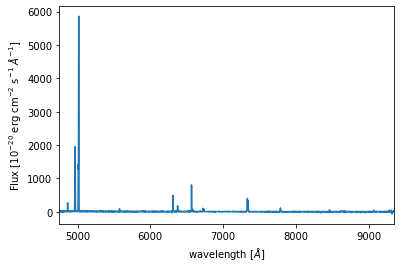

In [20]:
plot(lam,hdulist[1].data[:,71,213])
xlim(lam[0],lam[-1])
xlabel(r"wavelength [$\AA$]") 
ylabel(r"Flux [10$^{-20}$ erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]")

Text(0, 0.5, 'Flux [10$^{-20}$ erg cm$^{-2}$ s$^{-1}$ $\\AA^{-1}$]')

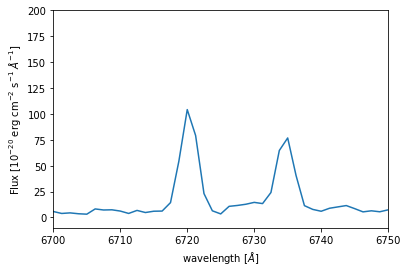

In [21]:
plot(lam,hdulist[1].data[:,71,213])
xlim(6700,6750)
ylim(-10,200)
xlabel(r"wavelength [$\AA$]") 
ylabel(r"Flux [10$^{-20}$ erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]")

In [22]:
from astropy.modeling import models, fitting

In [23]:
fitter=fitting.LevMarLSQFitter()

In [24]:
argmax(lam>6709.9)

1568

In [25]:
argmax(lam>6729.9)

1584

In [26]:
mod=models.Gaussian1D(amplitude=100,mean=argmax(lam>6720),stddev=1)

In [27]:
x=linspace(1568,1584,17)
x

array([1568., 1569., 1570., 1571., 1572., 1573., 1574., 1575., 1576.,
       1577., 1578., 1579., 1580., 1581., 1582., 1583., 1584.])

In [28]:
best_fit=fitter(mod,x,hdulist[1].data[1568:1585,71,213])

In [29]:
best_fit

<Gaussian1D(amplitude=105.13901377, mean=1576.19278942, stddev=1.0635821)>

In [30]:
best_fit_w=fitter(mod,x,hdulist[1].data[1568:1585,71,213],weights=hdulist[2].data[1568:1585,71,213])

In [31]:
best_fit_w

<Gaussian1D(amplitude=105.97154088, mean=1576.19935571, stddev=1.04679749)>

In [32]:
xx=linspace(1568,1584,100)
xx

array([1568.        , 1568.16161616, 1568.32323232, 1568.48484848,
       1568.64646465, 1568.80808081, 1568.96969697, 1569.13131313,
       1569.29292929, 1569.45454545, 1569.61616162, 1569.77777778,
       1569.93939394, 1570.1010101 , 1570.26262626, 1570.42424242,
       1570.58585859, 1570.74747475, 1570.90909091, 1571.07070707,
       1571.23232323, 1571.39393939, 1571.55555556, 1571.71717172,
       1571.87878788, 1572.04040404, 1572.2020202 , 1572.36363636,
       1572.52525253, 1572.68686869, 1572.84848485, 1573.01010101,
       1573.17171717, 1573.33333333, 1573.49494949, 1573.65656566,
       1573.81818182, 1573.97979798, 1574.14141414, 1574.3030303 ,
       1574.46464646, 1574.62626263, 1574.78787879, 1574.94949495,
       1575.11111111, 1575.27272727, 1575.43434343, 1575.5959596 ,
       1575.75757576, 1575.91919192, 1576.08080808, 1576.24242424,
       1576.4040404 , 1576.56565657, 1576.72727273, 1576.88888889,
       1577.05050505, 1577.21212121, 1577.37373737, 1577.53535

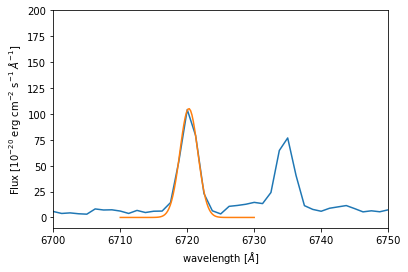

In [33]:
plot(lam,hdulist[1].data[:,71,213])
xlim(6700,6750)
ylim(-10,200)
xlabel(r"wavelength [$\AA$]") 
ylabel(r"Flux [10$^{-20}$ erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]")
plot(lam0+xx*dlam,best_fit(xx))

In [34]:
lambda_rest=6716.44

In [35]:
lobs=best_fit_w.mean.value*dlam+lam0
lobs

6720.249194642869

In [36]:
v=(lobs-lambda_rest)/lambda_rest*3e5
v

170.14346779854102

In [37]:
fitter.fit_info['param_cov']

array([[ 5.18165227e+00,  5.98108157e-03, -5.22975779e-02],
       [ 5.98108157e-03,  1.28960966e-03, -9.80784625e-05],
       [-5.22975779e-02, -9.80784625e-05,  1.83401796e-03]])

In [38]:
sqrt(fitter.fit_info['param_cov'][1][1])*dlam/lambda_rest*3e5

2.00503181229845

In [50]:
hdulist[1].data.shape

(3681, 326, 323)

In [51]:
imin=argmax(lam>4899.9)
imin

120

In [52]:
imax=argmax(lam>5099.9)
imax

280

In [53]:
hdulist[1].data=hdulist[1].data[imin:imax,:,:]

In [54]:
hdulist[1].data.shape

(160, 326, 323)

In [56]:
hdulist[2].data=hdulist[2].data[imin:imax,:,:]

In [58]:
hdulist.writeto('trimmed_cube.fits')

In [80]:
red=fits.open('../data/N103B_red.fits')

In [81]:
red[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   -32                                                 
NAXIS   =                     2                                                 
NAXIS1  =                   334                                                 
NAXIS2  =                   331                                                 
                                                                                
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRPIX1  =      176.83199441231                                                  
CD1_1   = -5.5555555555555E-05                                                  
CTYPE1  = 'RA---TAN'                                                            
CUNIT1  = 'deg     '                                                            
CRPIX2  =     164.4401655124

In [82]:
red[0].header.remove('CD3_3')
red[0].header.remove('CD1_3')
red[0].header.remove('CD2_3')
red[0].header.remove('CD3_1')
red[0].header.remove('CD3_2')
red[0].header.remove('CRVAL3')
red[0].header.remove('CRPIX3')
red[0].header.remove('CUNIT3')
red[0].header.remove('CTYPE3')

In [83]:
red[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   -32                                                 
NAXIS   =                     2                                                 
NAXIS1  =                   334                                                 
NAXIS2  =                   331                                                 
                                                                                
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRPIX1  =      176.83199441231                                                  
CD1_1   = -5.5555555555555E-05                                                  
CTYPE1  = 'RA---TAN'                                                            
CUNIT1  = 'deg     '                                                            
CRPIX2  =     164.4401655124

In [84]:
red.writeto('N103Bred.fits')

In [85]:
red.close()

In [86]:
green=fits.open("../data/N103B_green.fits")

In [87]:
green[0].header.remove('CD3_3')
green[0].header.remove('CD1_3')
green[0].header.remove('CD2_3')
green[0].header.remove('CD3_1')
green[0].header.remove('CD3_2')
green[0].header.remove('CRVAL3')
green[0].header.remove('CRPIX3')
green[0].header.remove('CUNIT3')
green[0].header.remove('CTYPE3')

In [88]:
green[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   -32                                                 
NAXIS   =                     2                                                 
NAXIS1  =                   334                                                 
NAXIS2  =                   331                                                 
                                                                                
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRPIX1  =      176.83199441231                                                  
CD1_1   = -5.5555555555555E-05                                                  
CTYPE1  = 'RA---TAN'                                                            
CUNIT1  = 'deg     '                                                            
CRPIX2  =     164.4401655124

In [89]:
green.writeto('N103Bgreen.fits')
green.close()

INFO: Auto-setting vmin to -2.227e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.619e+01 [aplpy.core]


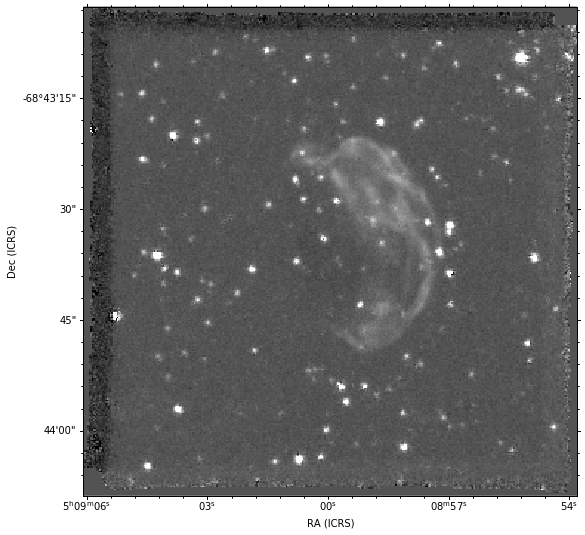

In [90]:
r=aplpy.FITSFigure('N103Bred.fits')
r.show_grayscale()

INFO: Auto-setting vmin to -3.948e+02 [aplpy.core]
INFO: Auto-setting vmax to  4.015e+03 [aplpy.core]


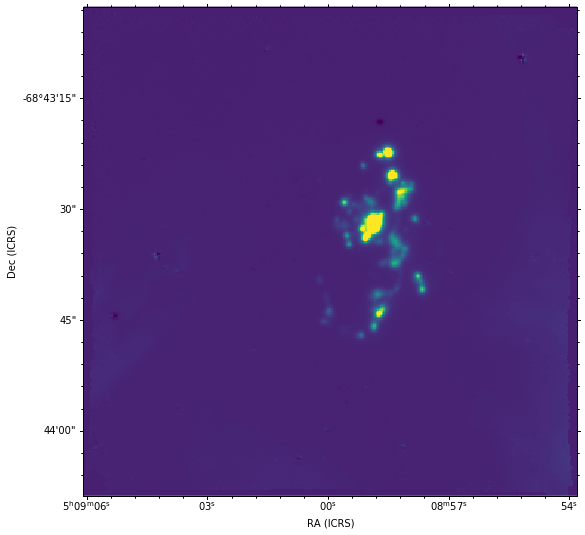

In [91]:
g=aplpy.FITSFigure('N103Bgreen.fits')
g.show_colorscale()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -3.801e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.219e+01 [aplpy.core]


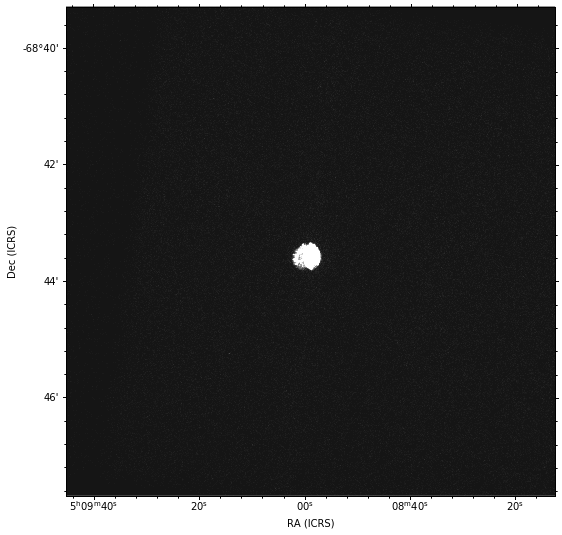

In [94]:
b=aplpy.FITSFigure('../data/N103B_Chandra.fits')
b.show_grayscale()

In [111]:
rfile='./N103Bred.fits'
gfile='./N103Bgreen.fits'
bfile=f'xN103B.fits'

In [132]:
aplpy.make_rgb_cube([rfile,gfile,bfile],'N103B_rgb.fits',north=True)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [133]:
aplpy.make_rgb_image('rgb_cube.fits','N103B_rgb.png')

INFO: Red: [aplpy.rgb]
INFO: vmin = -1.411e+01 (auto) [aplpy.rgb]
INFO: vmax =  2.265e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin = -5.280e+00 (auto) [aplpy.rgb]
INFO: vmax =  5.254e+03 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  1.452e+01 (auto) [aplpy.rgb]


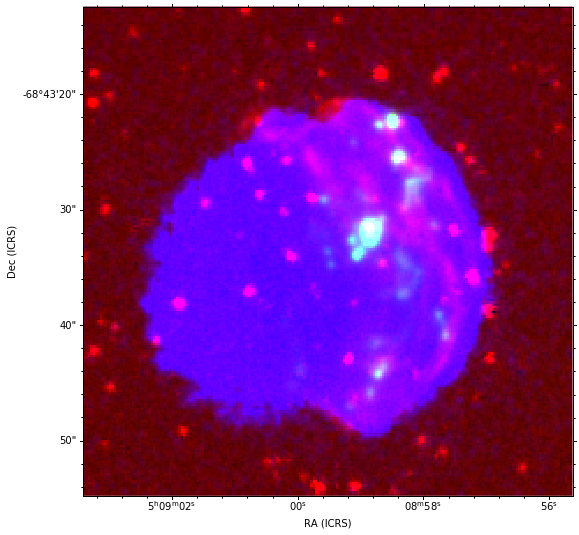

In [140]:
f = aplpy.FITSFigure('N103B_rgb_2d.fits')
f.recenter(77.248,-68.726,radius=1/170.)
f.show_rgb("N103B_rgb.png")

In [179]:
aplpy.make_rgb_image('N103B_rgb.fits','N103B_rgb.png',vmin_r=0.1,vmax_r=20,stretch_r='sqrt',vmin_g=1,vmax_g=600,vmin_b=0,vmax_b=100,stretch_g='linear')

INFO: Red: [aplpy.rgb]
INFO: vmin =  1.000e-01 [aplpy.rgb]
INFO: vmax =  2.000e+01 [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  1.000e+00 [aplpy.rgb]
INFO: vmax =  6.000e+02 [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  1.000e+02 [aplpy.rgb]


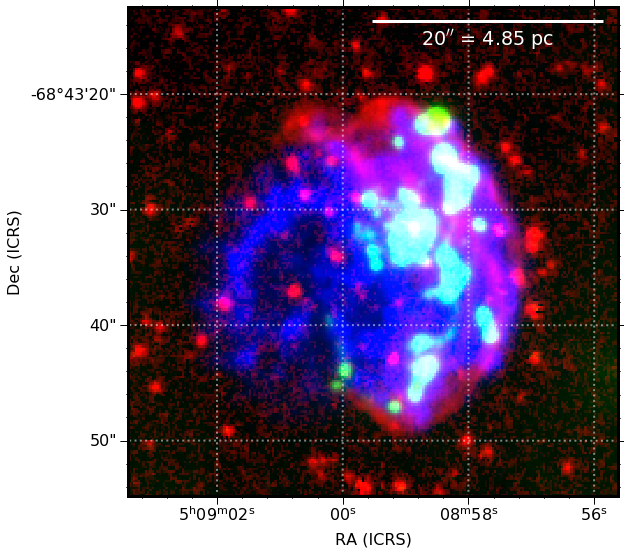

In [214]:
f = aplpy.FITSFigure('N103B_rgb_2d.fits')
f.recenter(77.248,-68.726,radius=1/170.)
f.tick_labels.set_font(size=16)
rcParams['axes.labelsize']=16
f.frame.set_linewidth(3)  # points
f.frame.set_color('black')
f.add_grid()
f.grid.set_color('white')
f.grid.set_linestyle(":")
f.grid.set_linewidth(2)
f.ticks.set_length(8)
from astropy import units as u
f.add_scalebar(0.00555555555)
f.scalebar.set_length(20 * u.arcsecond)
f.scalebar.set_corner('top right')
f.scalebar.set_label(r'20$^{\prime\prime}$ = 4.85 pc')
f.scalebar.set_color('white')
f.scalebar.set_linestyle('solid')
f.scalebar.set_linewidth(3)
f.scalebar.set_font(size='large', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
f.show_rgb("N103B_rgb.png")
savefig("RGB.png")